In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import matplotlib.pyplot as plt

from preprocessing import *

In [27]:
print("Training data file path: {}".format(train_dataset_file_path))
print("Testing data file path:  {}".format(test_dataset_file_path))


Training data file path: data/raw/train.jsonl
Testing data file path:  data/raw/test.jsonl


# Dataset

The dataset consist of 8243 samples and 15 columns.


In [28]:
df = load_dataset_raw(train_dataset_file_path, drop_na=False)
df

,source,citeEnd,sectionName,citeStart,string,label,label_confidence,citingPaperId,citedPaperId,isKeyCitation,id,unique_id,excerpt_index,label2,label2_confidence
0,explicit,175.0,Introduction,168.0,"However, how frataxin interacts with the Fe-S ...",background,1.0000,1872080baa7d30ec8fb87be9a65358cd3a7fb649,894be9b4ea46a5c422e81ef3c241072d4c73fdc0,True,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,11,NaN,NaN
1,explicit,36.0,Novel Quantitative Trait Loci for Seminal Root...,16.0,"In the study by Hickey et al. (2012), spikes w...",background,1.0000,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b,b6642e19efb8db5623b3cc4eef1c5822a6151107,True,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,2,NaN,NaN
2,explicit,228.0,Introduction,225.0,"The drug also reduces catecholamine secretion,...",background,1.0000,9cdf605beb1aa1078f235c4332b3024daa8b31dc,4e6a17fb8d7a3cada601d942e22eb5da6d01adbd,False,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,0,NaN,NaN
3,explicit,110.0,Discussion,46.0,By clustering with lowly aggressive close kin ...,background,1.0000,d9f3207db0c79a3b154f3875c9760cc6b056904b,2cc6ff899bf17666ad35893524a4d61624555ed7,False,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,3,NaN,NaN
4,explicit,239.0,Discussion,234.0,Ophthalmic symptoms are rare manifestations of...,background,1.0000,88b86556857f4374842d2af2e359576806239175,a5bb0ff1a026944d2a47a155462959af2b8505a8,False,88b86556857f4374842d2af2e359576806239175>a5bb0...,88b86556857f4374842d2af2e359576806239175>a5bb0...,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8238,explicit,50.0,,28.0,"Importantly, the results of Pascalis et al. (2...",background,0.7350,6f68ccd37718366c40ae6aeedf0b935bf560b215,60ed4bdabf92b2fbd6162dbd8979888cccca55d7,True,6f68ccd37718366c40ae6aeedf0b935bf560b215>60ed4...,6f68ccd37718366c40ae6aeedf0b935bf560b215>60ed4...,15,NaN,NaN
8239,explicit,182.0,DISCUSSION,179.0,"As suggested by Nguena et al, there is a need ...",background,0.7508,f2a1c1704f9587c94ed95bc98179dc499e933f5e,574e659da7f6c62c07bfaaacd1f31d65bd75524c,True,f2a1c1704f9587c94ed95bc98179dc499e933f5e>574e6...,f2a1c1704f9587c94ed95bc98179dc499e933f5e>574e6...,1,NaN,NaN
8240,explicit,120.0,DISCUSSION,108.0,Skeletal muscle is also a primary site of dise...,background,1.0000,18c97ea2ff60c110cc2a523e0fdf729608cbb083,fc13b9c3dfcc121013edaa12fa8ce7842aaed21a,False,18c97ea2ff60c110cc2a523e0fdf729608cbb083>fc13b...,18c97ea2ff60c110cc2a523e0fdf729608cbb083>fc13b...,8,NaN,NaN
8241,explicit,221.0,,185.0,ACTIVATION OF TRANSCRIPTION FACTORS Roles for ...,method,NaN,4ec9b89857c0b27e8a4bd3745b7358f387773527,81affdba19e38e2b17cf7b9e93792cc2028cf21d,True,4ec9b89857c0b27e8a4bd3745b7358f387773527>81aff...,4ec9b89857c0b27e8a4bd3745b7358f387773527>81aff...,0,NaN,NaN


In [29]:
df.columns.tolist()

['source',
 'citeEnd',
 'sectionName',
 'citeStart',
 'string',
 'label',
 'label_confidence',
 'citingPaperId',
 'citedPaperId',
 'isKeyCitation',
 'id',
 'unique_id',
 'excerpt_index',
 'label2',
 'label2_confidence']

# Loading the Dataset

For now, we are only interested in the **"string"** and **"label"** column

In general, we have an imbalanced dataset. 
* **background** -> 58.7%
* **method** -> 27.8%
* **result** -> 13.4%

In [30]:
sample_column_name = "string"
columns_to_keep = ['string', 'label', 'citeStart', 'citeEnd']

In [31]:
# Load dataset
df_train = load_dataset_raw(train_dataset_file_path, sample_column=sample_column_name, columns_to_keep=columns_to_keep)
df_test = load_dataset_raw(test_dataset_file_path, sample_column=sample_column_name, columns_to_keep=columns_to_keep)

# {'background': 0, 'method': 1, 'result': 2}
unique_labels = df_train['label'].unique()

In [32]:
unique_labels

array(['background', 'method', 'result'], dtype=object)

In [33]:
label_to_index

{'background': 0, 'method': 1, 'result': 2}

In [34]:
df_train

,string,label,citeStart,citeEnd
0,"However, how frataxin interacts with the Fe-S ...",background,168.0,175.0
1,"In the study by Hickey et al. (2012), spikes w...",background,16.0,36.0
2,"The drug also reduces catecholamine secretion,...",background,225.0,228.0
3,By clustering with lowly aggressive close kin ...,background,46.0,110.0
4,Ophthalmic symptoms are rare manifestations of...,background,234.0,239.0
...,...,...,...,...
8238,"Importantly, the results of Pascalis et al. (2...",background,28.0,50.0
8239,"As suggested by Nguena et al, there is a need ...",background,179.0,182.0
8240,Skeletal muscle is also a primary site of dise...,background,108.0,120.0
8241,ACTIVATION OF TRANSCRIPTION FACTORS Roles for ...,method,185.0,221.0


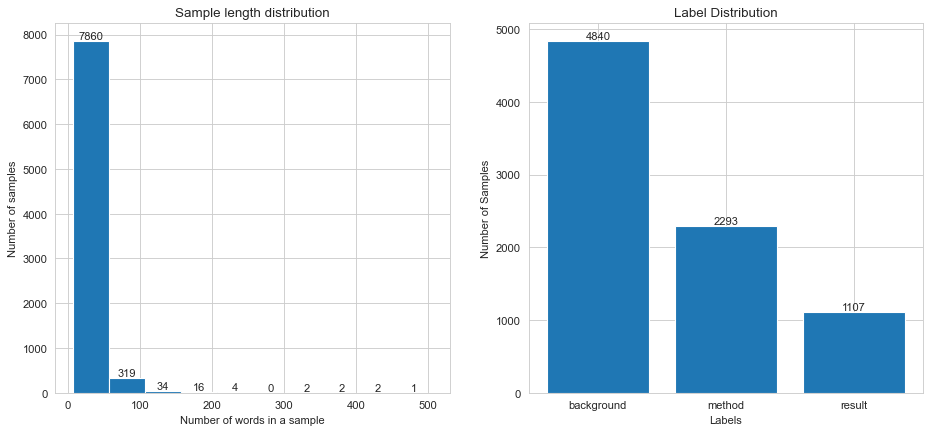

In [35]:
sample_name = "string"
label_name = "label"

text_lengths = [len(s.split()) for s in df_train[sample_name]]

plt.figure(figsize=(14,6),dpi=80)
plt.subplot(1,2,1)
counts, bins, _ = plt.hist(text_lengths)
plt.xlabel('Number of words in a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
# 
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 25, count, str(int(count)), ha='center', va='bottom')

value_counts = df_train[label_name].value_counts().sort_index()

plt.subplot(1,2,2)
plt.bar(unique_labels, value_counts)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Label Distribution')

for index, value in enumerate(value_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

# Data Preparation

* **Tokenization:** Word tokenization with SpaCy

* **Normalization:** Case normalization, punctuation removal, whitespaces removal

* **Stemming & Lemmatization:** Reducing words to their base forms

* **Feature Extraction** Extract citation tokens from the text (via cite locations or regex, for now we use regex)


In [36]:
# Initialize spaCy tokenizer
nlp = initialize_tokenizer()

In [37]:
sample_index = 0
df_train.iloc[sample_index]["string"]

'However, how frataxin interacts with the Fe-S cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (IscS [12,22], IscU/Isu1 [6,11,16] or ISD11/Isd11 [14,15]).'

In [38]:
text = df_train.iloc[sample_index]["string"]
cite_start = df_train.iloc[sample_index]["citeStart"]
cite_end = df_train.iloc[sample_index]["citeEnd"]

normalized_text = normalize_sentence(text)

tokenized_text = tokenize_sentence(normalized_text, nlp)
lemmatized_text = lemmatize_sentence(normalized_text, nlp)

print("No citation extraction:")
print()
print("Normalized Text:")
print(normalized_text)
print()
print("Lemmatized Text:")
print(lemmatized_text)
print()

text_sp = extract_citation_tokens(text, cite_loc=None)

normalized_text = normalize_sentence(text_sp)

tokenized_text = tokenize_sentence(normalized_text, nlp)
lemmatized_text = lemmatize_sentence(normalized_text, nlp)

print("Lemmatized Text with feature extraction:")
print(lemmatized_text)

No citation extraction:

Normalized Text:
however, how frataxin interacts with the fe-s cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (iscs [12, 22], iscu/isu1 [6, 11,16] or isd11/isd11 [14, 15]).

Lemmatized Text:
['however', ',', 'how', 'frataxin', 'interact', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'component', 'remain', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interaction', 'with', 'each', 'component', 'be', 'report', '(', 'isc', '[', '12', ',', '22', ']', ',', 'iscu', '/', 'isu1', '[', '6', ',', '11,16', ']', 'or', 'isd11', '/', 'isd11', '[', '14', ',', '15', ']', ')', '.']

Lemmatized Text with feature extraction:
['however', ',', 'how', 'frataxin', 'interact', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'component', 'remain', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interaction', 'with', 'each', 'component', 'be', 'report', '<cite>', '.']


In [39]:
# text = "However, how frataxin interacts with the Fe-S cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (IscS [12,22], IscU/Isu1 [6,11,16] or ISD11/Isd11 [14,15])."
# cite_start = 168.0
# cite_end = 175.0

text = df_train.iloc[sample_index]["string"]
cite_start = df_train.iloc[sample_index]["citeStart"]
cite_end = df_train.iloc[sample_index]["citeEnd"]

text_sp = extract_citation_tokens(text, cite_loc=(cite_start, cite_end))

normalized_text = normalize_sentence(text_sp)

tokenized_text = tokenize_sentence(normalized_text, nlp)
lemmatized_text = lemmatize_sentence(normalized_text, nlp)

print("Citation token extraction via citeStart citeEnd:")
print()
print("Normalized Text:")
print(normalized_text)
print()
print("Tokenized Text:")
print(tokenized_text)
print()
print("Lemmatized Text:")
print(lemmatized_text)


Citation token extraction via citeStart citeEnd:

Normalized Text:
however, how frataxin interacts with the fe-s cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (iscs <cite> iscu/isu1 [6, 11,16] or isd11/isd11 [14, 15]).

Tokenized Text:
['however', ',', 'how', 'frataxin', 'interacts', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'components', 'remains', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interactions', 'with', 'each', 'component', 'were', 'reported', '(', 'iscs', '<cite>', 'iscu', '/', 'isu1', '[', '6', ',', '11,16', ']', 'or', 'isd11', '/', 'isd11', '[', '14', ',', '15', ']', ')', '.']

Lemmatized Text:
['however', ',', 'how', 'frataxin', 'interact', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'component', 'remain', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interaction', 'with', 'each', 'component', 'be', 'report', '(', 'iscs', '<cite>', 'iscu', '/', '

In [40]:
text = df_train.iloc[sample_index]["string"]
cite_start = df_train.iloc[sample_index]["citeStart"]
cite_end = df_train.iloc[sample_index]["citeEnd"]

text_sp = extract_citation_tokens(text, cite_loc=None)

normalized_text = normalize_sentence(text_sp)

tokenized_text = tokenize_sentence(normalized_text, nlp)
lemmatized_text = lemmatize_sentence(normalized_text, nlp)

print("Citation token extraction via regex:")
print()
print("Normalized Text:")
print(normalized_text)
print()
print("Tokenized Text:")
print(tokenized_text)
print()
print("Lemmatized Text:")
print(lemmatized_text)

Citation token extraction via regex:

Normalized Text:
however, how frataxin interacts with the fe-s cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported <cite>.

Tokenized Text:
['however', ',', 'how', 'frataxin', 'interacts', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'components', 'remains', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interactions', 'with', 'each', 'component', 'were', 'reported', '<cite>', '.']

Lemmatized Text:
['however', ',', 'how', 'frataxin', 'interact', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'component', 'remain', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interaction', 'with', 'each', 'component', 'be', 'report', '<cite>', '.']


In [41]:
test_text = df_train.iloc[sample_index]['string']
test_processed_text = process_sentence(test_text, nlp)
print("Raw text:")
print(test_text)
print()
print("Tokenized text:")
print(test_processed_text)

Raw text:
However, how frataxin interacts with the Fe-S cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (IscS [12,22], IscU/Isu1 [6,11,16] or ISD11/Isd11 [14,15]).

Tokenized text:
['however', ',', 'how', 'frataxin', 'interact', 'with', 'the', 'fe', '-', 's', 'cluster', 'biosynthesis', 'component', 'remain', 'unclear', 'as', 'direct', 'one', '-', 'to', '-', 'one', 'interaction', 'with', 'each', 'component', 'be', 'report', '<cite>', '.']


# Data Preprocessing

Preprocess the dataset and format them into a list of samples and list of labels

In [42]:
# processing the dataset
print("Processing train dataset...")
texts_train, labels_train, token_counter = process_data(df_train, label_to_index, nlp)

print("Processing test dataset...")
texts_test, labels_test, _ = process_data(df_test, label_to_index, nlp)

print('Total number of training samples: {}'.format(len(texts_train)))
print('Total number of test samples: {}'.format(len(texts_test)))
print('Number of unique tokens: {}'.format(len(token_counter)))

Processing train dataset...


100%|██████████| 8240/8240 [02:17<00:00, 59.80it/s] 


Processing test dataset...


100%|██████████| 1857/1857 [00:23<00:00, 78.80it/s] 

Total number of training samples: 8240
Total number of test samples: 1857
Number of unique tokens: 21565


In [43]:
# shuffle the dataset
texts_train, labels_train = shuffle_data(texts_train, labels_train)

In [44]:
len(texts_train)

8240

In [45]:
texts_train[0]

['nevertheless',
 ',',
 'compelling',
 'evi-',
 'dence',
 'suggest',
 'that',
 'cholinergic',
 'transmission',
 'be',
 'a',
 'major',
 'modulator',
 'of',
 'the',
 'induction',
 'process',
 '<cite>',
 '.']

# Vocabulary

We will use the top 10000 tokens for the vocabulary

In [46]:
# number of unique tokens
len(token_counter.items())

21565

In [47]:
# initialize and save vocabulary
vocab_size = 10000
vocab = initialize_vocabulary(token_counter, vocab_size=10000)
save_vocabulary(vocab, vocabulary_file_path)
print('Vocabulary saved to {}'.format(vocabulary_file_path))

Vocabulary saved to data/processed/vocabulary.vocab


# Saving Processed Dataset

word-vocab indices are saved as a text file

In [48]:
# save the process training and testing dataset
save_dataset(texts_train, labels_train, vocab, processed_train_dataset_file_path)
print('Train Dataset saved to {}'.format(processed_train_dataset_file_path))

save_dataset(texts_test, labels_test, vocab, processed_test_dataset_file_path)
print('Test Dataset saved to {}'.format(processed_test_dataset_file_path))
    

Train Dataset saved to data/processed/processed-data-train.txt
Test Dataset saved to data/processed/processed-data-test.txt
